## Построение и сохранения графиков, нужных для отчета.
### Загрузим логи экспериментов:

In [1]:
import pickle
 
with open('GD_SGD_step_alpha_beta_batch_size.pkl', 'rb') as f:
    alpha_beta_bsize_logs = pickle.load(f)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# def dependence_line_plot(history_list, parameter_name,
#                          dep_variable_name_x, dep_variable_name_y,
#                          smooth_size,
#                          figsize=(10, 5),
#                          semilogy=False,
#                          output_file_name='exp.pdf'):
    
#     keys_for_df = [dep_variable_name_x, dep_variable_name_y]
#     plt.figure(figsize=figsize)
    
#     history_df_list = [pd.DataFrame({key: history[key] for key in keys_for_df}) for history in history_list]
#     max_time_list = []
#     for history_df in history_df_list:
#         start_val = np.array()
#         med_val = np.cumsum(history_df[dep_variable_name_x])[smooth_size:-smooth_size] -\
#                                    np.cumsum(history_df[dep_variable_name_x])[smooth_size+1]
#         sns.lineplot(x = np.cumsum(history_df[dep_variable_name_x])[smooth_size:-smooth_size] -\
#                                    np.cumsum(history_df[dep_variable_name_x])[smooth_size+1],
#                      y=np.convolve(history_df[dep_variable_name_y][:],
#                                    np.ones(smooth_size) / smooth_size, 'same')[smooth_size:-smooth_size])
#         max_time_list.append(max(np.cumsum(history_df[dep_variable_name_x])[smooth_size+1:-smooth_size] -\
#                                    np.cumsum(history_df[dep_variable_name_x])[smooth_size+1]))
#     if semilogy:
#         plt.semilogy()
# #     plt.xlim(None, np.mean(max_time_list) + 1)
# #     plt.ylim(0.82, 0.9)
#     plt.legend(labels=[parameter_name + '=' + str(history[parameter_name]) for history in history_list],
#                loc='best')
#     plt.xlabel(dep_variable_name_x)
#     plt.ylabel(dep_variable_name_y)
#     plt.savefig(output_file_name)

In [4]:
def dependence_line_plot(history_list, parameter_name,
                         dep_variable_name_x, dep_variable_name_y,
                         smooth_size,
                         figsize=(10, 5),
                         semilogy=False,
                         semilogx=False,
                         output_file_name='exp.pdf'):
    
    if dep_variable_name_x != 'iteration':
        keys_for_df = [dep_variable_name_x, dep_variable_name_y]
    else:
        keys_for_df = [dep_variable_name_y]
        
    plt.figure(figsize=figsize)
    
    history_df_list = [pd.DataFrame({key: history[key] for key in keys_for_df}) for history in history_list]
    max_time_list = []
    for history_df in history_df_list:
        if dep_variable_name_x == 'time':
            sns.lineplot(x = np.cumsum(history_df[dep_variable_name_x])[smooth_size:-smooth_size] -\
                                       np.cumsum(history_df[dep_variable_name_x])[smooth_size+1],
                         y=np.convolve(history_df[dep_variable_name_y][:],
                                       np.ones(smooth_size) / smooth_size, 'same')[smooth_size:-smooth_size])
            max_time_list.append(max(np.cumsum(history_df[dep_variable_name_x])[smooth_size+1:-smooth_size] -\
                                       np.cumsum(history_df[dep_variable_name_x])[smooth_size+1]))
        elif dep_variable_name_x == 'epoch_num':
            sns.lineplot(x = history_df[dep_variable_name_x][smooth_size:-smooth_size] -\
                                       history_df[dep_variable_name_x][smooth_size+1],
                         y=np.convolve(history_df[dep_variable_name_y][:],
                                       np.ones(smooth_size) / smooth_size, 'same')[smooth_size:-smooth_size])
        else:
            sns.lineplot(x = np.arange(len(history_df[dep_variable_name_y]) - smooth_size * 2),
                         y=np.convolve(history_df[dep_variable_name_y][:],
                                       np.ones(smooth_size) / smooth_size, 'same')[smooth_size:-smooth_size])
    if semilogy:
        plt.semilogy()
    if semilogx:
        plt.semilogx()
#     plt.xlim(None, np.mean(max_time_list) + 1)
#     plt.ylim(0.82, 0.9)
    plt.legend(labels=[parameter_name + '=' + str(history[parameter_name]) for history in history_list],
               loc='best')
    plt.xlabel(dep_variable_name_x)
    plt.ylabel(dep_variable_name_y)
    plt.savefig(output_file_name)

In [5]:
np.random.seed(13)

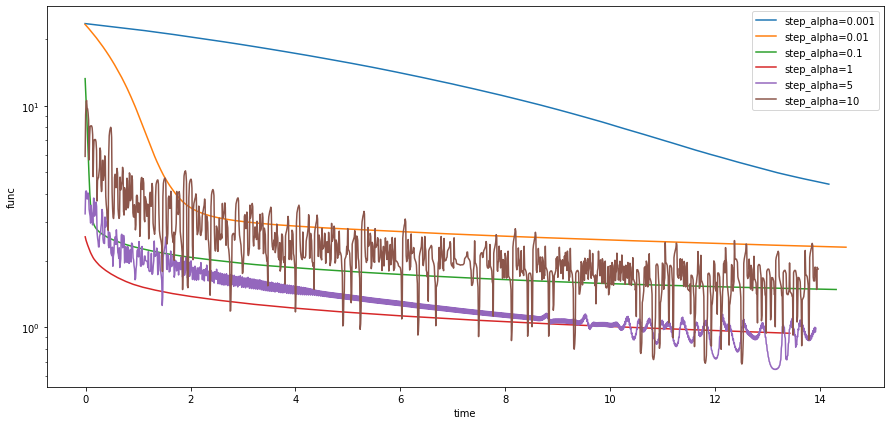

In [6]:
# f, (ax1, ax2) = plt.subplots(2, figsize=(10, 30))
# for i in [ax1, ax2]:

dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(0, 48, 8)],
                     parameter_name='step_alpha',
                     dep_variable_name_x='time', dep_variable_name_y='func', smooth_size=7,
                     semilogy=True,
                     figsize=(15, 7),
#                      ax=i,
#                      fig=f,
                     output_file_name='./graphs/exp1_func_GD_alpha_time_beta=0,001.pdf')
#     plt.legend(labels=[parameter_name + '=' + str(history[parameter_name]) for history in history_list],
#                loc='best')
#     plt.xlabel(dep_variable_name_x)
#     plt.ylabel(dep_variable_name_y)
#     plt.savefig(output_file_name)

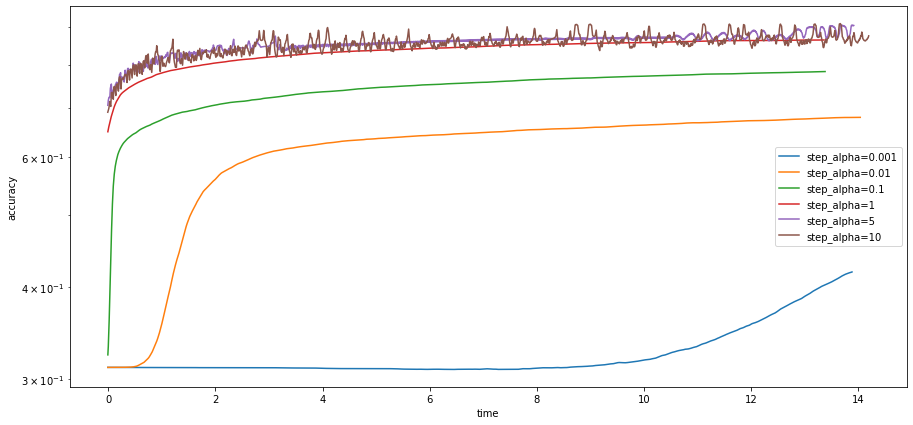

In [7]:
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(1, 48, 8)],
                     parameter_name='step_alpha',
                     dep_variable_name_x='time', dep_variable_name_y='accuracy', smooth_size=7,
                     figsize=(15, 7),
                     semilogy=True,
                     output_file_name='./graphs/exp1_accuracy_GD_alpha_time_beta=0,001.pdf')

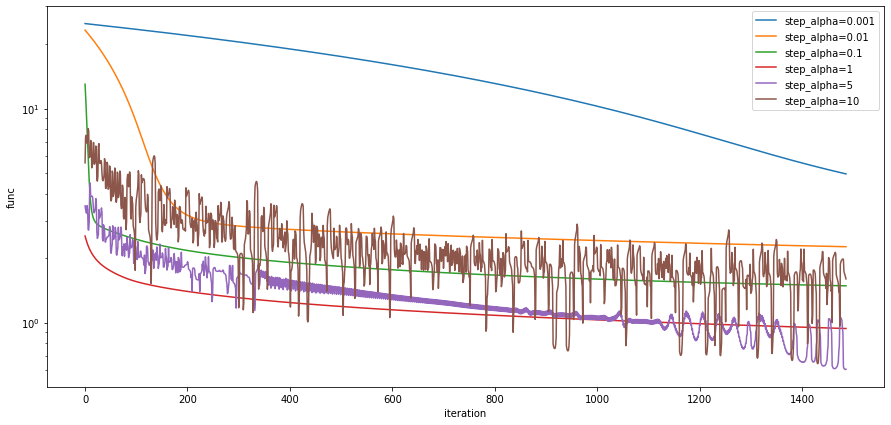

In [8]:
# f, (ax1, ax2) = plt.subplots(2, figsize=(10, 30))
# for i in [ax1, ax2]:

dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(1, 48, 8)],
                     parameter_name='step_alpha',
                     dep_variable_name_x='iteration', dep_variable_name_y='func', smooth_size=7,
                     semilogy=True,
                     figsize=(15, 7),
#                      ax=i,
#                      fig=f,
                     output_file_name='./graphs/exp1_func_GD_alpha_iteration_beta=0,001.pdf')
#     plt.legend(labels=[parameter_name + '=' + str(history[parameter_name]) for history in history_list],
#                loc='best')
#     plt.xlabel(dep_variable_name_x)
#     plt.ylabel(dep_variable_name_y)
#     plt.savefig(output_file_name)

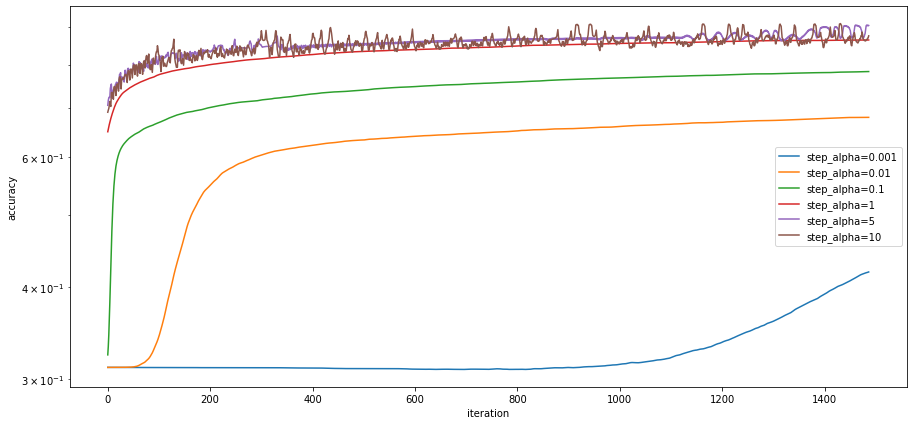

In [9]:
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(1, 48, 8)],
                     parameter_name='step_alpha',
                     dep_variable_name_x='iteration', dep_variable_name_y='accuracy', smooth_size=7,
                     figsize=(15, 7),
                     semilogy=True,
                     output_file_name='./graphs/exp1_accuracy_GD_alpha_iteration_beta=0,001.pdf')

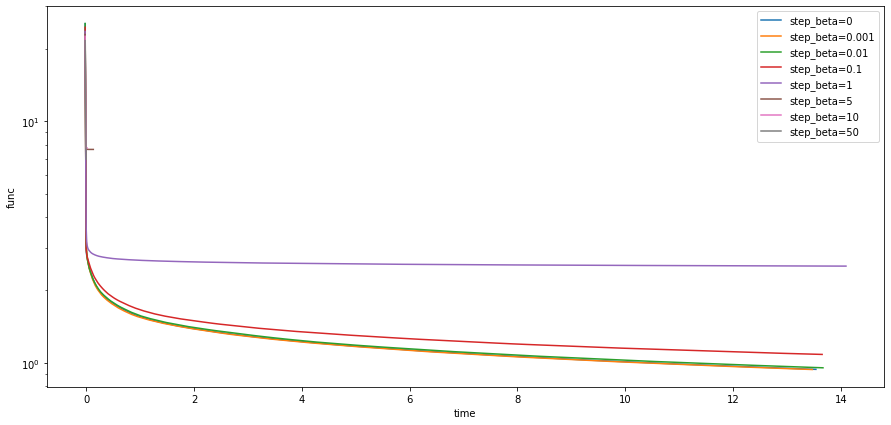

In [10]:
start_ind = 24
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+8)],
                     parameter_name='step_beta',
                     dep_variable_name_x='time', dep_variable_name_y='func', smooth_size=1,
                     figsize=(15, 7),
                     semilogy=True,
                     output_file_name='./graphs/exp2_func_GD_beta_time_alpha=1.pdf')
# plt.semilogx()

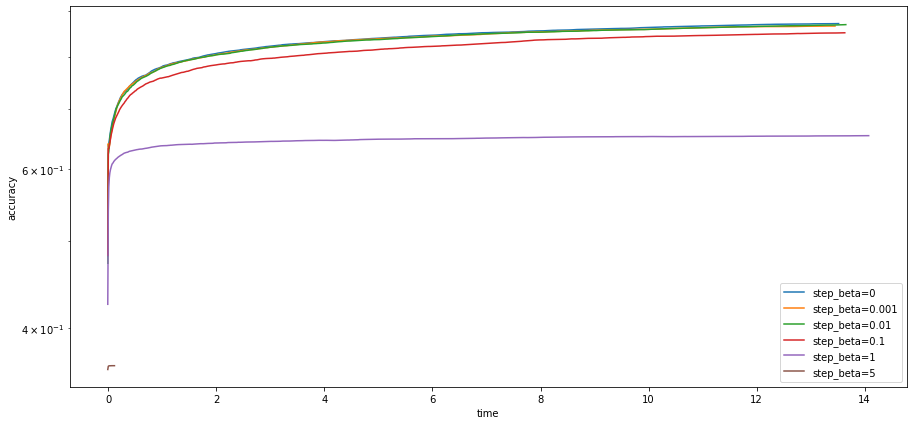

In [11]:
start_ind = 24
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+6)],
                     parameter_name='step_beta',
                     dep_variable_name_x='time', dep_variable_name_y='accuracy', smooth_size=2,
                     figsize=(15, 7),
                     semilogy=True,
                     output_file_name='./graphs/exp2_accuracy_GD_beta_time_alpha=1.pdf')

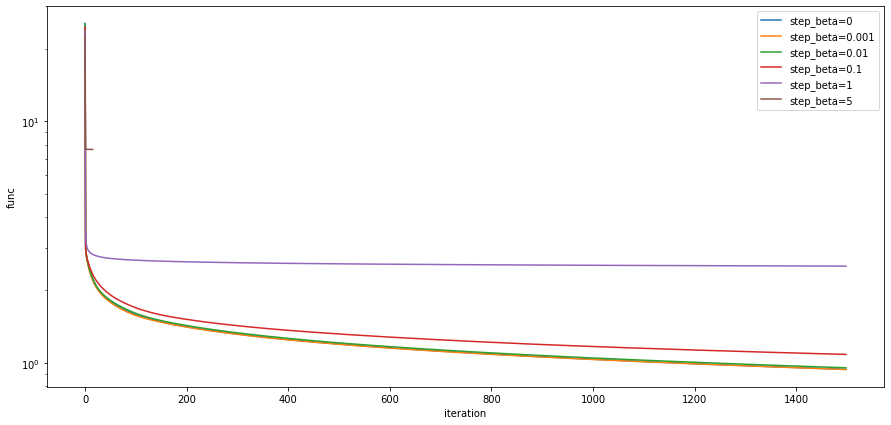

In [12]:
start_ind = 24
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+6)],
                     parameter_name='step_beta',
                     dep_variable_name_x='iteration', dep_variable_name_y='func', smooth_size=1,
                     figsize=(15, 7),
                     semilogy=True,
                     output_file_name='./graphs/exp2_func_GD_beta_iteration_alpha=1.pdf')

[]

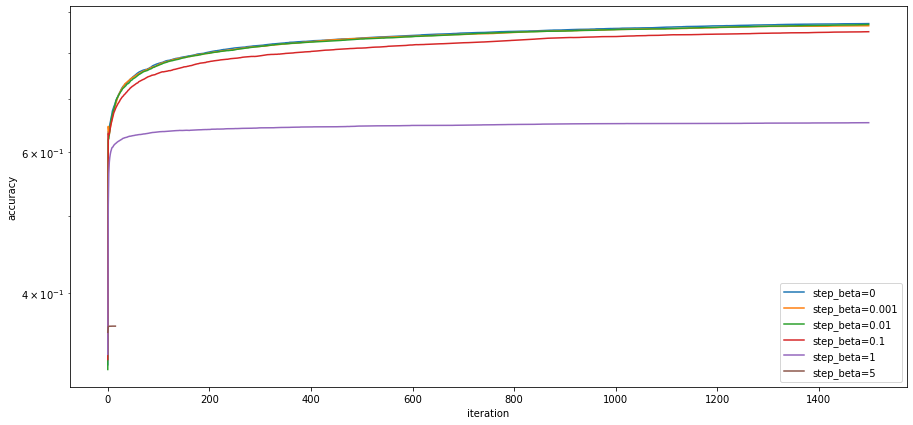

In [13]:
start_ind = 24
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+6)],
                     parameter_name='step_beta',
                     dep_variable_name_x='iteration', dep_variable_name_y='accuracy', smooth_size=1,
                     figsize=(15, 7),
                     semilogy=True,
                     output_file_name='./graphs/exp2_accuracy_GD_beta_iteration_alpha=1.pdf')
plt.semilogy()

### Из графика видно, что step_beta = 1 дает плохой результат, поэтому далее в работе рассматриваются только первые 4 значения

## Доделать график для начального приближения !

## Графики для SGD:

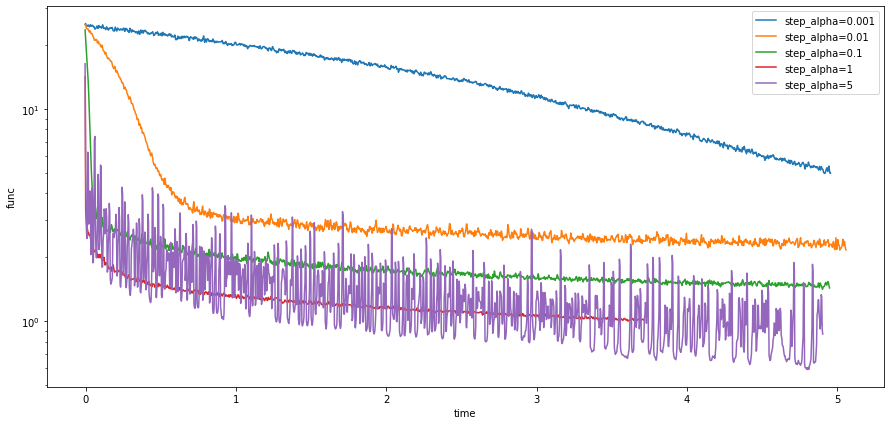

In [14]:
start_ind = 60 + 8
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+56*5, 56)],
                     parameter_name='step_alpha',
                     dep_variable_name_x='time', dep_variable_name_y='func', smooth_size=2,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp1_func_SGD_alpha_time_beta=0,001_bs=4096.pdf')

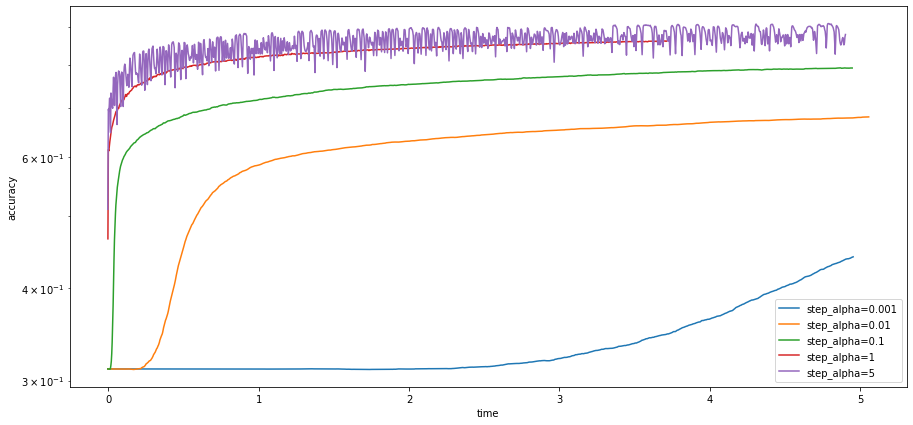

In [15]:
start_ind = 60 + 8
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+56*5, 56)],
                     parameter_name='step_alpha',
                     dep_variable_name_x='time', dep_variable_name_y='accuracy', smooth_size=2,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp1_accuracy_SGD_alpha_time_beta=0,001_bs=4096.pdf')

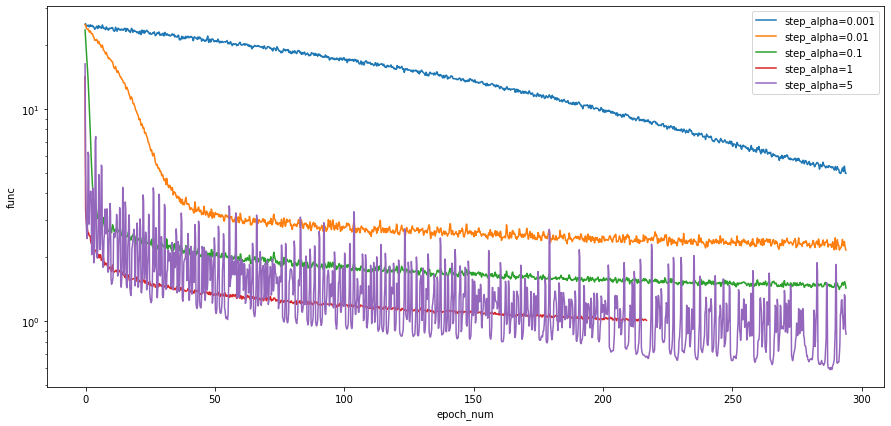

In [16]:
start_ind = 60 + 8
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+56*5, 56)],
                     parameter_name='step_alpha',
                     dep_variable_name_x='epoch_num', dep_variable_name_y='func', smooth_size=2,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp1_func_SGD_alpha_epoch_num_beta=0,001_bs=4096.pdf')

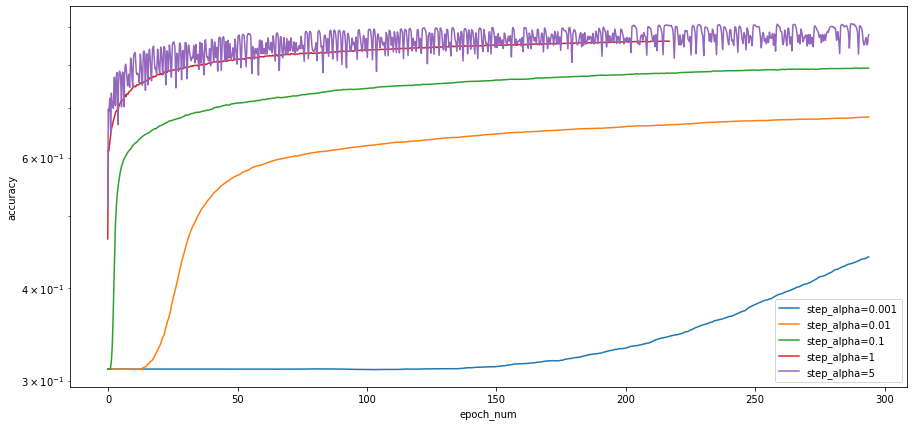

In [17]:
start_ind = 60 + 8
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+56*5, 56)],
                     parameter_name='step_alpha',
                     dep_variable_name_x='epoch_num', dep_variable_name_y='accuracy', smooth_size=2,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp1_accuracy_SGD_alpha_epoch_num_beta=0,001_bs=4096.pdf')

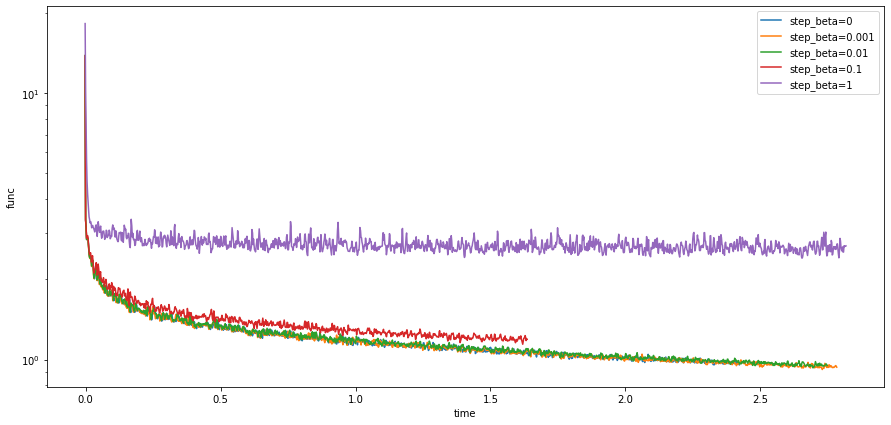

In [18]:
start_ind = 60 + 56*3
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+7*5, 7)],
                     parameter_name='step_beta',
                     dep_variable_name_x='time', dep_variable_name_y='func', smooth_size=2,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp2_func_SGD_beta_time_alpha=1_bs=4096.pdf')

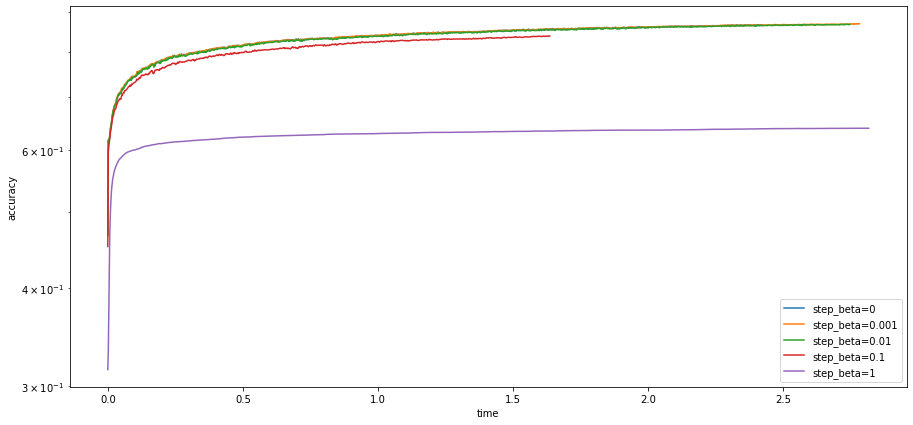

In [19]:
start_ind = 60 + 56*3
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+7*5, 7)],
                     parameter_name='step_beta',
                     dep_variable_name_x='time', dep_variable_name_y='accuracy', smooth_size=2,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp2_accuracy_SGD_beta_time_alpha=1_bs=4096.pdf')

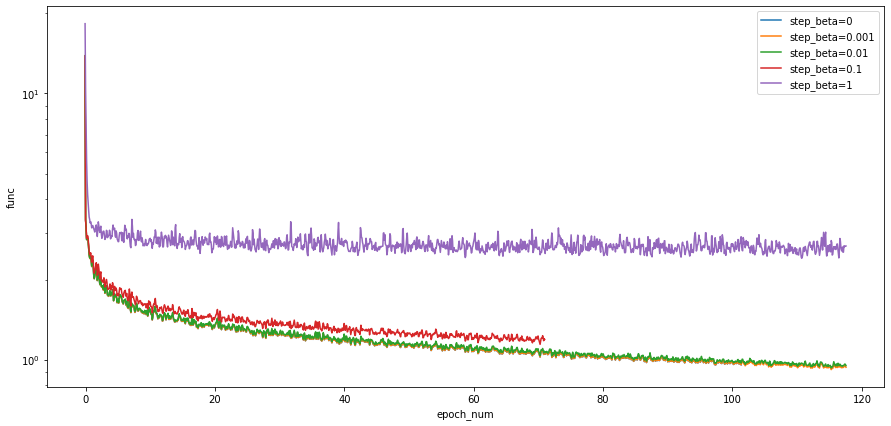

In [20]:
start_ind = 60 + 56*3
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+7*5, 7)],
                     parameter_name='step_beta',
                     dep_variable_name_x='epoch_num', dep_variable_name_y='func', smooth_size=2,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp2_func_SGD_beta_epoch_num_alpha=1_bs=4096.pdf')

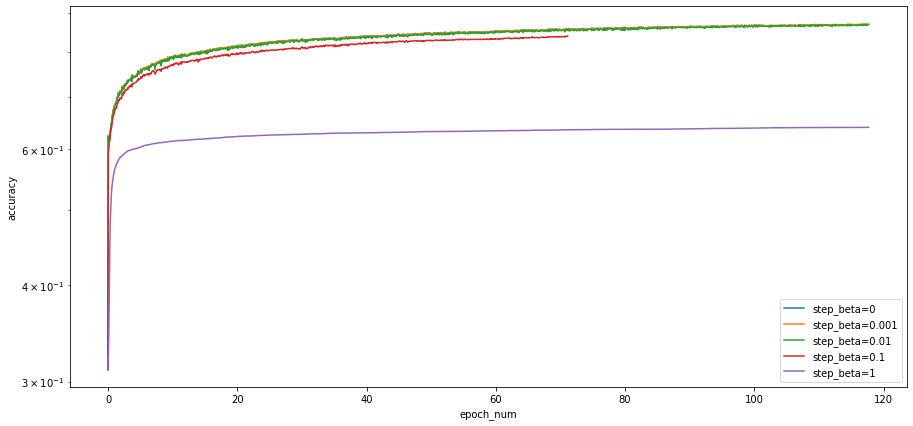

In [21]:
start_ind = 60 + 56*3
dependence_line_plot([alpha_beta_bsize_logs[i] for i in range(start_ind, start_ind+7*5, 7)],
                     parameter_name='step_beta',
                     dep_variable_name_x='epoch_num', dep_variable_name_y='accuracy', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp2_accuracy_SGD_beta_epoch_num_alpha=1_bs=4096.pdf')

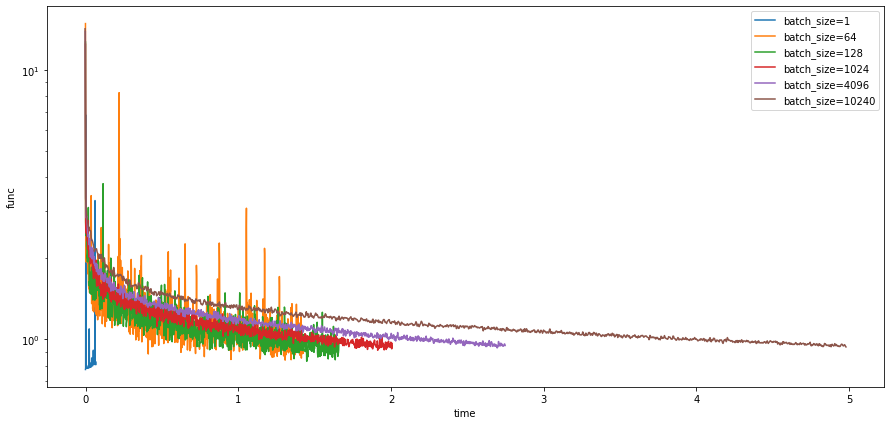

In [22]:
start_ind = 60 + 56 * 3 + 7 * 2
dependence_line_plot([alpha_beta_bsize_logs[i] for i in [start_ind-4,
                                                         start_ind-3,
                                                         start_ind-2,
                                                         start_ind-1,
                                                         start_ind,
                                                         start_ind+1]],
                     parameter_name='batch_size',
                     dep_variable_name_x='time', dep_variable_name_y='func', smooth_size=2,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp3_func_SGD_bs_time_alpha=1_beta=0,01.pdf')

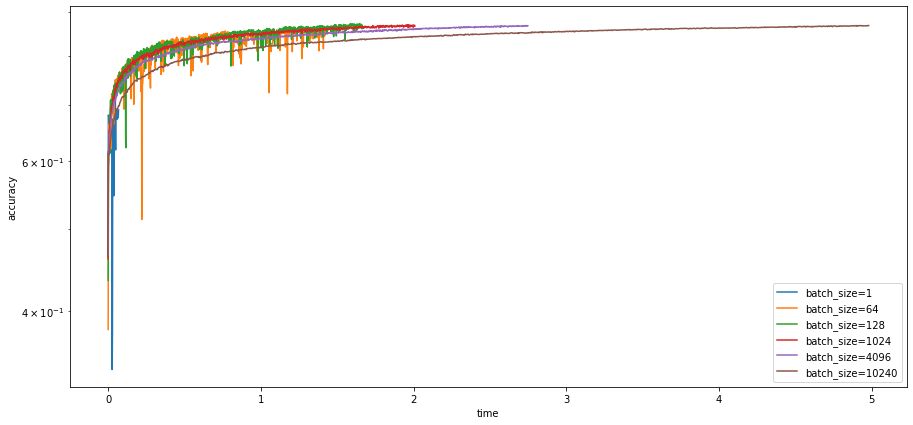

In [23]:
start_ind = 60 + 56 * 3 + 7 * 2
dependence_line_plot([alpha_beta_bsize_logs[i] for i in [start_ind-4,
                                                         start_ind-3,
                                                         start_ind-2,
                                                         start_ind-1,
                                                         start_ind,
                                                         start_ind+1]],
                     parameter_name='batch_size',
                     dep_variable_name_x='time', dep_variable_name_y='accuracy', smooth_size=2,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp3_accuracy_SGD_bs_time_alpha=1_beta=0,01.pdf')

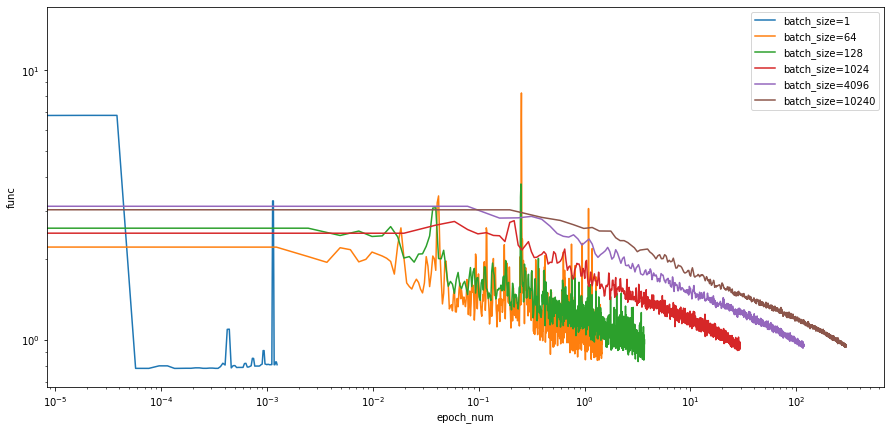

In [24]:
start_ind = 60 + 56 * 3 + 7 * 2
dependence_line_plot([alpha_beta_bsize_logs[i] for i in [start_ind-4,
                                                         start_ind-3,
                                                         start_ind-2,
                                                         start_ind-1,
                                                         start_ind,
                                                         start_ind+1]],
                     parameter_name='batch_size',
                     dep_variable_name_x='epoch_num', dep_variable_name_y='func', smooth_size=2,
                     semilogy=True,
                     semilogx=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp3_func_SGD_bs_epoch_num_alpha=1_beta=0,01.pdf')
plt.semilogx()
plt.savefig('./graphs/exp2_func_SGD_bs_epoch_num_alpha=5_beta=0,01.pdf')

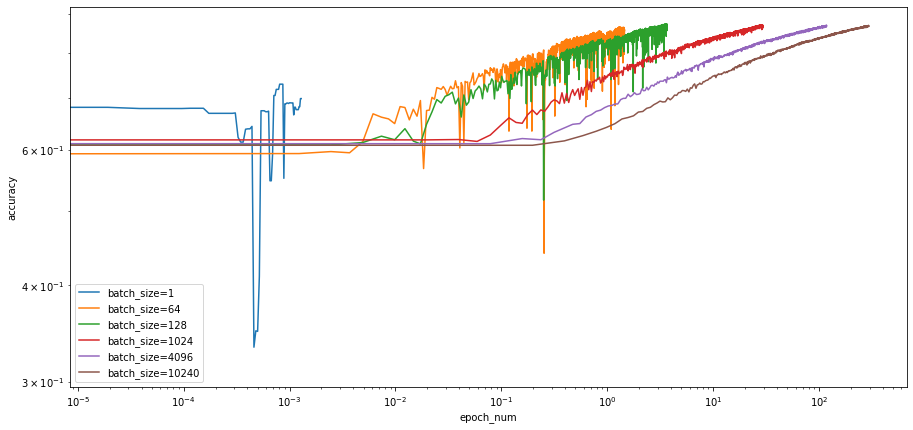

In [25]:
start_ind = 60 + 56 * 3 + 7 * 2
dependence_line_plot([alpha_beta_bsize_logs[i] for i in [start_ind-4,
                                                         start_ind-3,
                                                         start_ind-2,
                                                         start_ind-1,
                                                         start_ind,
                                                         start_ind+1]],
                     parameter_name='batch_size',
                     dep_variable_name_x='epoch_num', dep_variable_name_y='accuracy', smooth_size=1,
                     semilogy=True,
                     semilogx=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp3_accuracy_SGD_bs_epoch_num_alpha=1_beta=0,01.pdf')

plt.savefig('./graphs/exp2_accuracy_SGD_bs_epoch_num_alpha=5_beta=0,01.pdf')

## Исследование начального приближения.

In [26]:
import pickle
 
with open('GD_SGD_w_0_init.pkl', 'rb') as f:
    GD_SGD_init_logs = pickle.load(f)
    
for i in range(len(GD_SGD_init_logs)):
    if i % 7 == 0:
        GD_SGD_init_logs[i]['w_0'] = '0'
    elif i % 7 == 1:
        GD_SGD_init_logs[i]['w_0'] = 'U(0, 1)'
    elif i % 7 == 2:
        GD_SGD_init_logs[i]['w_0'] = 'U(100, 500)'
    elif i % 7 == 3:
        GD_SGD_init_logs[i]['w_0'] = 'U(1000, 5000)'
    elif i % 7 == 4:
        GD_SGD_init_logs[i]['w_0'] = 'U(10000, 50000)'
    elif i % 7 == 5:
        GD_SGD_init_logs[i]['w_0'] = 'N(0, 1)'
    elif i % 7 == 6:
        GD_SGD_init_logs[i]['w_0'] = 'N(0.5, 0.5)'
        

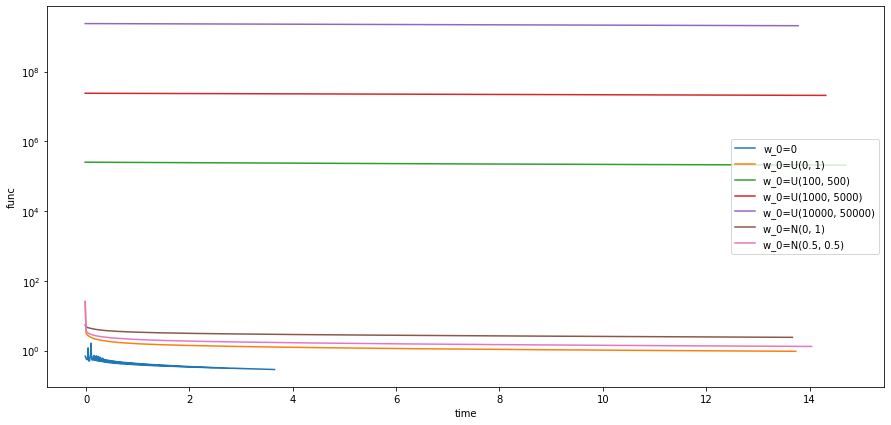

In [46]:
start_ind = 0
dependence_line_plot([GD_SGD_init_logs[i] for i in range(start_ind, start_ind+7, 1)],
                     parameter_name='w_0',
                     dep_variable_name_x='time', dep_variable_name_y='func', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp4_func_GD_w_0_time_alpha=1_beta=0,01.pdf')

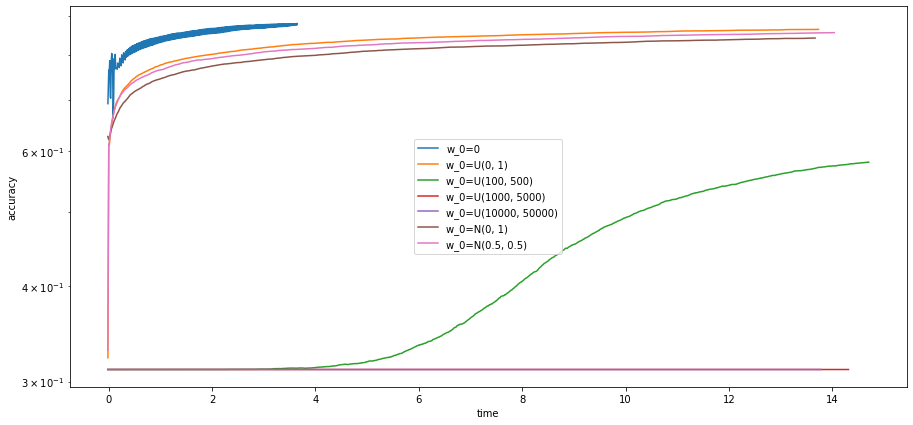

In [47]:
start_ind = 0
dependence_line_plot([GD_SGD_init_logs[i] for i in range(start_ind, start_ind+7, 1)],
                     parameter_name='w_0',
                     dep_variable_name_x='time', dep_variable_name_y='accuracy', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp4_accuracy_GD_w_0_time_alpha=1_beta=0,01.pdf')

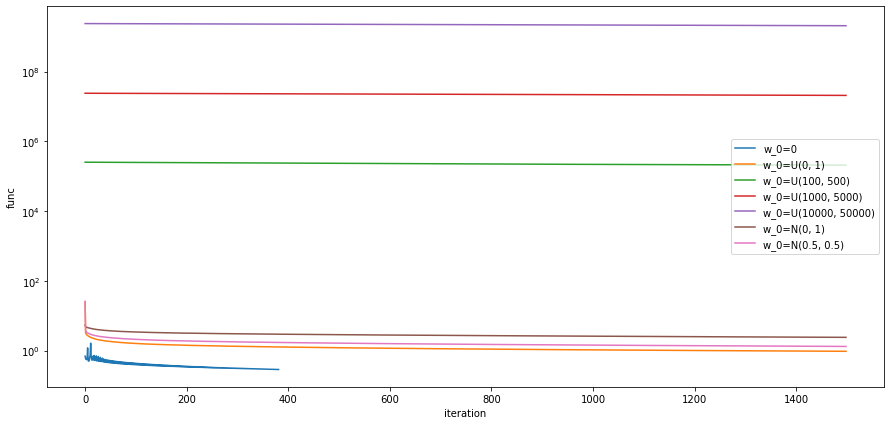

In [48]:
start_ind = 0
dependence_line_plot([GD_SGD_init_logs[i] for i in range(start_ind, start_ind+7, 1)],
                     parameter_name='w_0',
                     dep_variable_name_x='iteration', dep_variable_name_y='func', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp4_func_GD_w_0_iteration_alpha=1_beta=0,01.pdf')

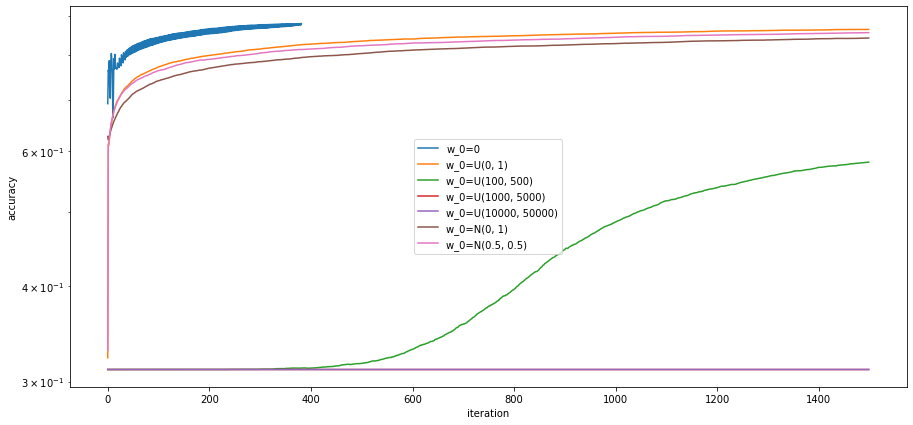

In [49]:
start_ind = 0
dependence_line_plot([GD_SGD_init_logs[i] for i in range(start_ind, start_ind+7, 1)],
                     parameter_name='w_0',
                     dep_variable_name_x='iteration', dep_variable_name_y='accuracy', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp4_accuracy_GD_w_0_iteration_alpha=1_beta=0,01.pdf')

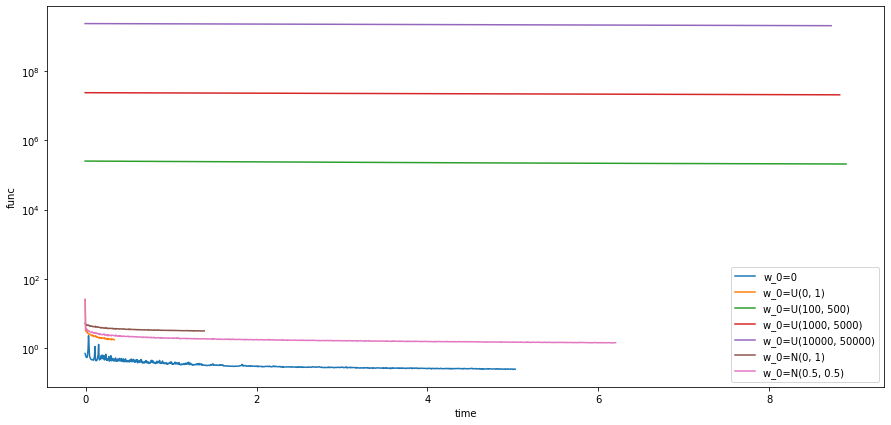

In [50]:
start_ind = 7
dependence_line_plot([GD_SGD_init_logs[i] for i in range(start_ind, start_ind+7, 1)],
                     parameter_name='w_0',
                     dep_variable_name_x='time', dep_variable_name_y='func', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp4_func_SGD_w_0_time_alpha=1_beta=0,01.pdf')

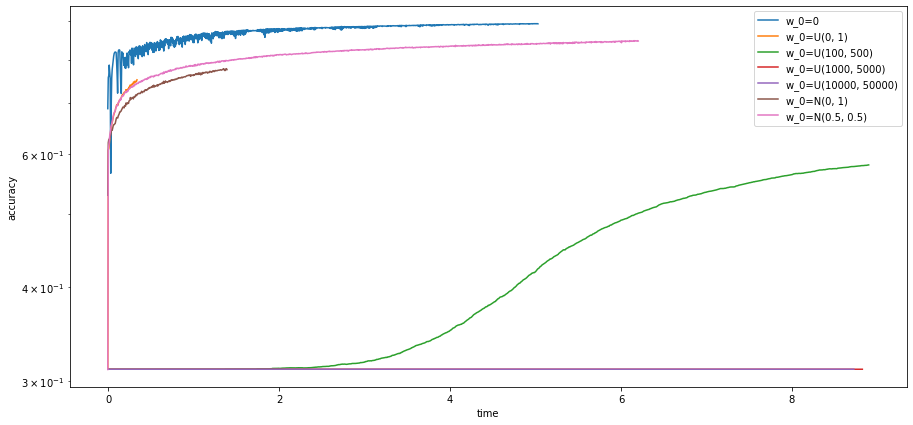

In [52]:
start_ind = 7
dependence_line_plot([GD_SGD_init_logs[i] for i in range(start_ind, start_ind+7, 1)],
                     parameter_name='w_0',
                     dep_variable_name_x='time', dep_variable_name_y='accuracy', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp4_accuracy_SGD_w_0_time_alpha=1_beta=0,01.pdf')

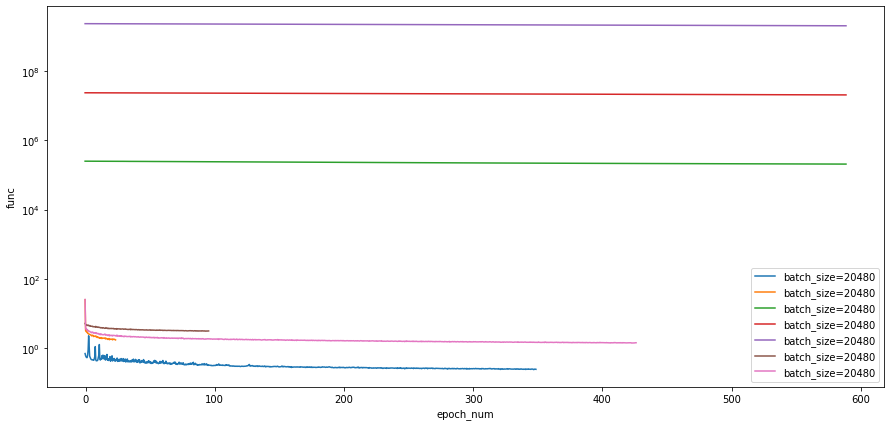

In [53]:
start_ind = 7
dependence_line_plot([GD_SGD_init_logs[i] for i in range(start_ind, start_ind+7, 1)],
                     parameter_name='w_0',
                     dep_variable_name_x='epoch_num', dep_variable_name_y='func', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp4_func_GD_w_0_epoch_num_alpha=1_beta=0,01_bs.pdf')

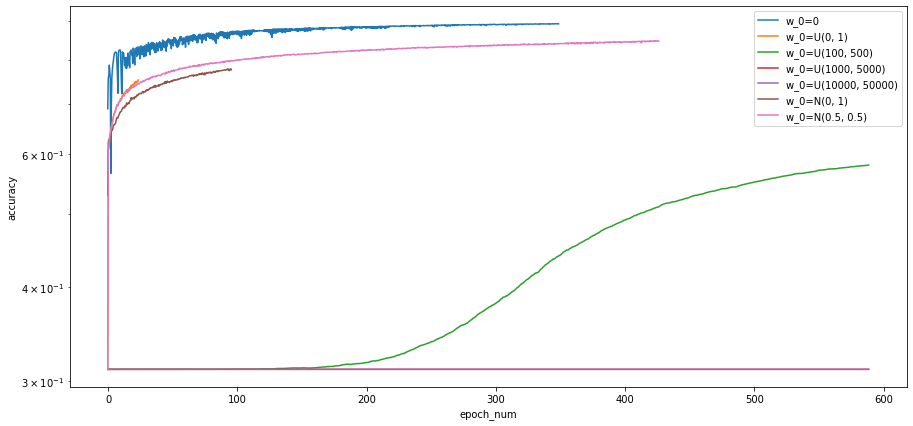

In [34]:
start_ind = 7
dependence_line_plot([GD_SGD_init_logs[i] for i in range(start_ind, start_ind+7, 1)],
                     parameter_name='w_0',
                     dep_variable_name_x='epoch_num', dep_variable_name_y='accuracy', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
                     output_file_name='./graphs/exp3.pdf')

In [35]:
keys_for_df = ['time', 'func', 'accuracy', 'classifier_type']

In [36]:
counters = [0 , 0]
for item in alpha_beta_bsize_logs:
    if item['classifier_type'] == 'GD':
        counters[0] += 1
    else:
        counters[1] += 1

In [37]:
counters

[56, 392]

In [61]:
for i, item in enumerate(alpha_beta_bsize_logs):
    if (item['classifier_type'] == 'GD') & (item['step_alpha'] == 1) & (item['step_beta'] == 0.001):
        print(i)
    if (item['classifier_type'] == 'SGD') & (item['step_alpha'] == 1) & (item['step_beta'] == 0.001):
        print(i)

25
231
232
233
234
235
236
237


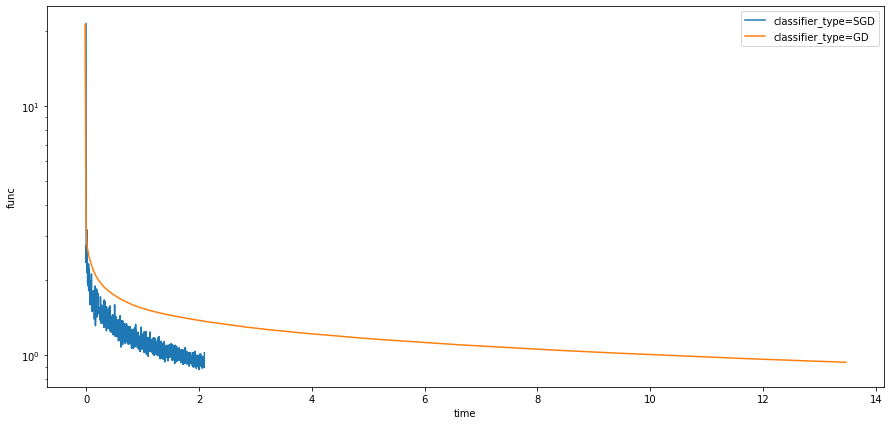

In [214]:
dependence_line_plot([alpha_beta_bsize_logs[234], alpha_beta_bsize_logs[25]],
                     parameter_name='classifier_type',
                     dep_variable_name_x='time', dep_variable_name_y='func', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
#                      ax=i,
#                      fig=f,
                     output_file_name='./graphs/SGD_GD_func_alpha=1_beta=0,001_bs=1024.pdf')

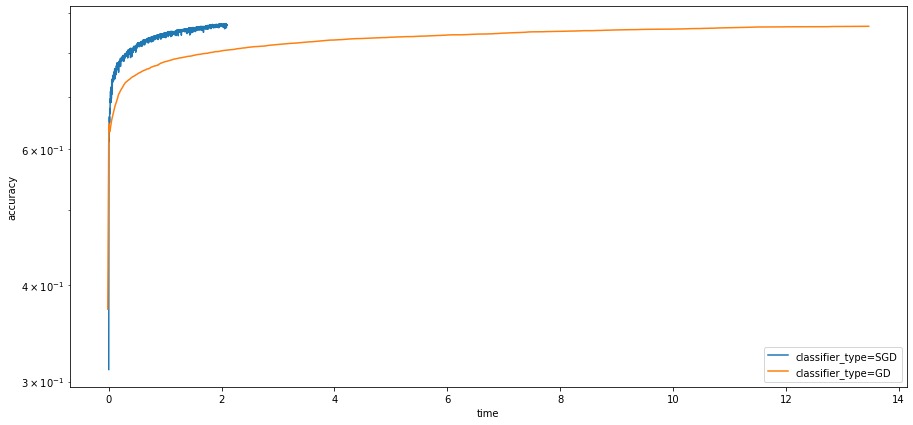

In [226]:
dependence_line_plot([alpha_beta_bsize_logs[234], alpha_beta_bsize_logs[25]],
                     parameter_name='classifier_type',
                     dep_variable_name_x='time', dep_variable_name_y='accuracy', smooth_size=1,
                     semilogy=True,
                     figsize=(15, 7),
#                      ax=i,
#                      fig=f,
                     output_file_name='./graphs/SGD_GD_accuracy_alpha=1_beta=0,001_bs=1024.pdf')


In [227]:
gd_time_list = []
sgd_time_list = []
for i, item in enumerate(alpha_beta_bsize_logs[:]):
    if item['classifier_type'] == 'GD':
#         if np.sum(item['time']) > 2:
        gd_time_list.append(np.sum(item['time']))
    if (item['classifier_type'] == 'SGD'):
        if (item['batch_size'] == 1024):
            sgd_time_list.append(np.sum(item['time']))

In [228]:
gd_time_arr = np.array(gd_time_list)

In [229]:
sgd_time_arr = np.array(sgd_time_list)

In [231]:
np.mean(gd_time_arr), np.mean(sgd_time_arr)

(8.85191021646772, 1.9641166755131312)

[]

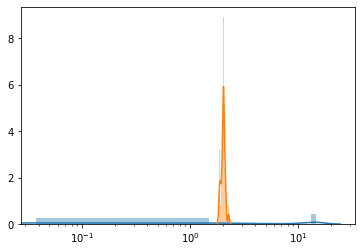

In [220]:
sns.distplot(a=gd_time_arr, bins=10, norm_hist=True)
sns.distplot(a=sgd_time_arr[:30], bins=10, norm_hist=True)
plt.semilogx()

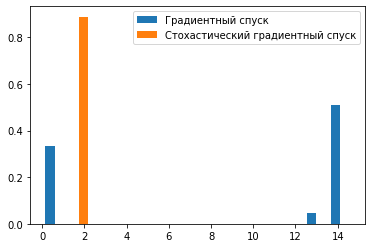

In [221]:
plt.hist([gd_time_arr, sgd_time_arr], bins=13, density=True)
plt.legend(labels=['Градиентный спуск', 'Стохастический градиентный спуск'],
               loc='best')
# plt.semilogx()

In [39]:
hist_1_df['time'][smooth_size+1]

0.003443002700805664

In [40]:
np.cumsum(hist_0_df['time'])[smooth_size+1:-smooth_size] - np.cumsum(hist_0_df['time'])[smooth_size+1]

101      0.000000
102      0.009662
103      0.018622
104      0.028242
105      0.037857
          ...    
1396    12.256440
1397    12.266201
1398    12.276277
1399    12.286274
1400    12.296746
Name: time, Length: 1300, dtype: float64